In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline


In [3]:
df = pd.read_csv('Cleaned_Data.csv')

In order to look at the relationship between movie budgets and return on investment more generally, the movies were put into three categories: low budget, mid-range budget, and high budget. These categories were determined first by looking at the distribution of the total cost data for the data set. The 25% quartile was approximately 20 million, so that was assigned the low budget. The 75% quartile was 100 million, so all budgets over that was assigned to high budget. Any movie that cost between 20 million and 100 million was classified as a mid-range budget. When looking at the number of movies assigned to each category, the low budget was changed to movies under 25 million to create a more even distribution of movies in each category. A new column was added to the data frame to denote their budget classication. The code is shown below:

In [4]:
df['budget_category'] = df['total_costs'].apply(lambda x: 'low' if x < 25000000 else ('mid' if x < 100000000 else 'high' ))

In [31]:
low_budget = df[df['budget_category'] == 'low']
mid_budget = df[df['budget_category'] == 'mid']
high_budget = df[df['budget_category'] == 'high']

high_budget.corr()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,advertisement_budget,profit,genres_not_parsed_id,genres_Action_id,genres_Adventure_id,genres_Comedy_id,genres_Drama_id,genres_Family_id,genres_Thriller_id,genres_Documentary_id,genres_num_of_parses,ROI,total_costs
Unnamed: 0,1.000000,0.119123,-0.932087,-0.521398,-0.612347,-0.050081,-0.269636,-0.932087,-0.325985,NaN,-0.266002,-0.505148,0.193143,0.279696,-0.093628,0.168567,0.032865,-0.228545,-0.074295,-0.932087
id,0.119123,1.000000,-0.173131,-0.093539,-0.112657,0.044586,-0.063224,-0.173131,-0.059229,NaN,-0.044972,-0.072853,-0.020135,0.041115,0.036984,0.077395,-0.005804,-0.021919,0.010738,-0.173131
production_budget,-0.932087,-0.173131,1.000000,0.526653,0.627503,0.065010,0.329743,1.000000,0.313811,NaN,0.249354,0.461640,-0.219458,-0.259706,0.061520,-0.141397,-0.017773,0.173431,0.047800,1.000000
domestic_gross,-0.521398,-0.093539,0.526653,1.000000,0.925790,0.081823,0.243713,0.526653,0.891228,NaN,0.071286,0.283300,-0.015619,-0.216334,0.006650,-0.104149,-0.065154,0.059749,0.692867,0.526653
worldwide_gross,-0.612347,-0.112657,0.627503,0.925790,1.000000,0.115504,0.262008,0.627503,0.936200,NaN,0.102820,0.340952,-0.065445,-0.250577,-0.001244,-0.072052,-0.041094,0.085911,0.711433,0.627503
start_year,-0.050081,0.044586,0.065010,0.081823,0.115504,1.000000,0.102679,0.065010,0.111507,NaN,0.085522,0.115600,-0.071546,0.008712,-0.034689,-0.046239,0.024260,0.075211,0.096181,0.065010
runtime_minutes,-0.269636,-0.063224,0.329743,0.243713,0.262008,0.102679,1.000000,0.329743,0.170404,NaN,0.210999,-0.056312,-0.458954,0.277329,-0.080172,0.064567,-0.113365,-0.047426,0.028179,0.329743
advertisement_budget,-0.932087,-0.173131,1.000000,0.526653,0.627503,0.065010,0.329743,1.000000,0.313811,NaN,0.249354,0.461640,-0.219458,-0.259706,0.061520,-0.141397,-0.017773,0.173431,0.047800,1.000000
profit,-0.325985,-0.059229,0.313811,0.891228,0.936200,0.111507,0.170404,0.313811,1.000000,NaN,0.012826,0.207392,0.019256,-0.188336,-0.029287,-0.024037,-0.042090,0.026477,0.845984,0.313811
genres_not_parsed_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


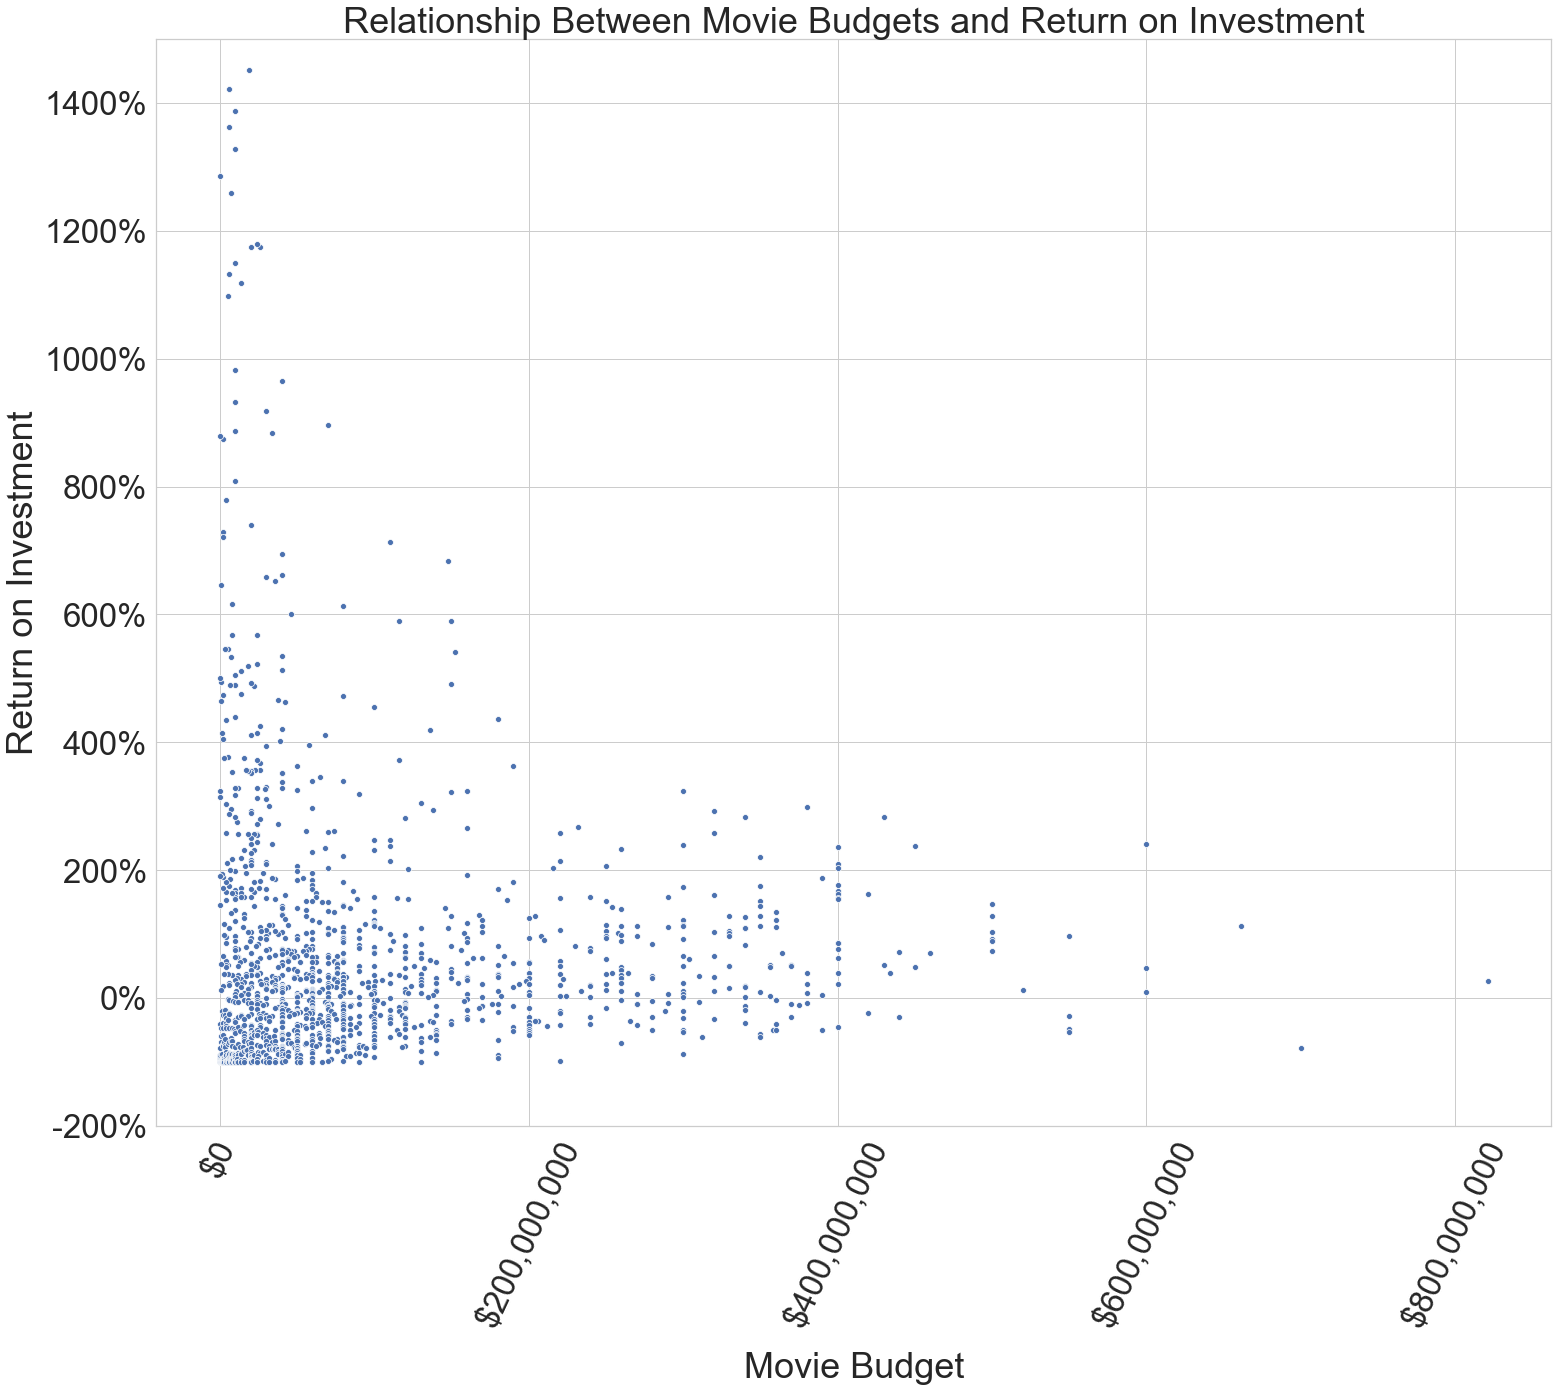

In [13]:
def budget_ROI_scatter (dataframe):

    fig, ax = plt.subplots(figsize = (25, 20))
    sns.set(font_scale = 3, style = 'whitegrid')
    sns.scatterplot(data = df, x = 'total_costs', y = 'ROI', ax = ax)
    plt.ylim(-200, 1500)
    plt.xlabel('Movie Budget')
    plt.ylabel('Return on Investment')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.title('Relationship Between Movie Budgets and Return on Investment')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    plt.xticks(rotation=65)
    ax.xaxis.labelpad = 20

    return plt.show()

#fig.savefig('ALLBudget_vs_ROI.png', bbox_inches='tight')

The first step in the analysis was to determine if there is a correlation between the amount of money invested in a movie and the return on investment. This will help decide if it is more beneficial to invest in larger blockbuster movies or if there is more return for smaller, low budget films. A scatterplot was created with the film's budget (production and advertisement costs) on the x-axis and the return on investment as a percentage on the y-axis. This was then further broken down by the low, mid, and high budget classification to more clearly show the divide between the budgets.

This plot shows that there is no strong correlation between a film's budget and it's return on investment. The correlation coefficient is -0.05, further confirming no correlation. When broken out into the individual budget tiers, the low and mid-range budgets had a correlation coefficient  

There were a few outliers not shown in this plot to more clearly show the remainder of the data. These data points were from low budget films. There are significantly fewer high-end outliers for middle and high budgets. 

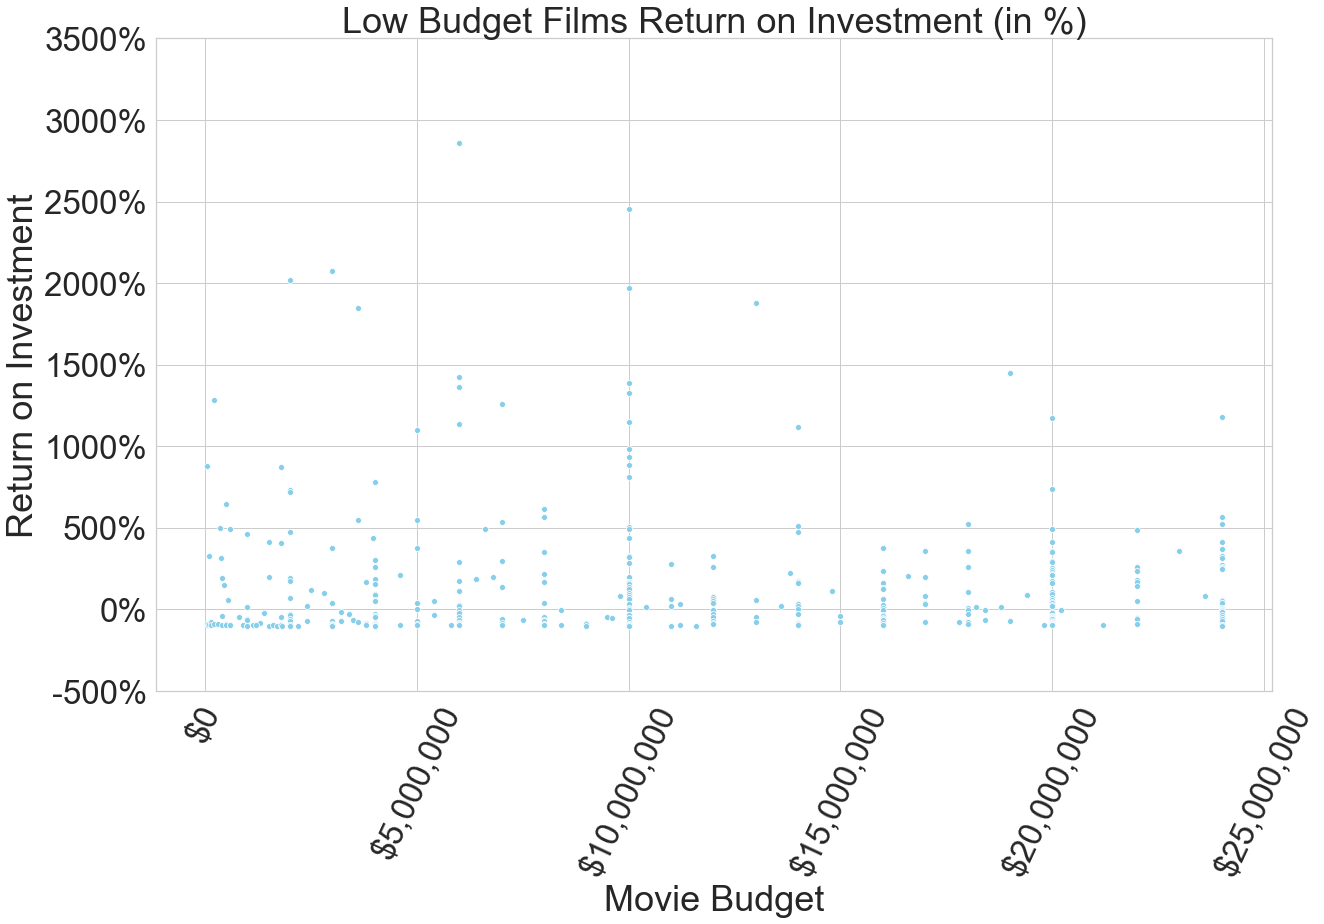

In [12]:
def LB_ROI_scatter(dataframe):

    fig, ax = plt.subplots(figsize = (20, 12))
    sns.scatterplot(data = df[df['budget_category'] == 'low'], 
                    x = 'total_costs', 
                    y = 'ROI', 
                    ax = ax, 
                    color = 'skyblue')
    plt.ylim(-500, 3500)
    plt.xlabel('Movie Budget')
    plt.ylabel('Return on Investment')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    plt.xticks(rotation=65)
    plt.title('Low Budget Films Return on Investment (in %)')

    return plt.show()

#fig.savefig('lowbudgetROIscatter', bbox_inches='tight')


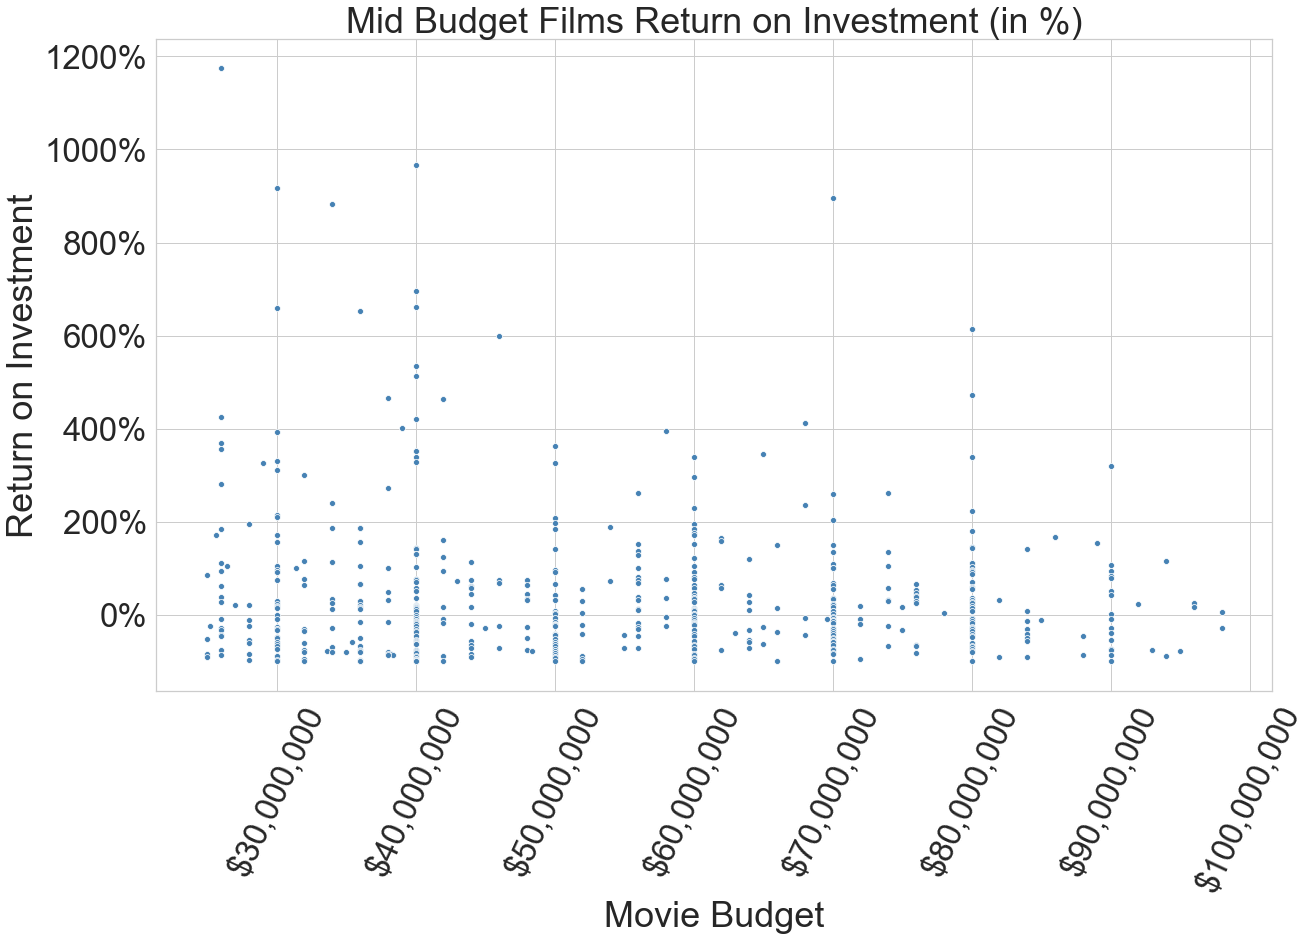

In [9]:
def MB_ROI_scatter (DataFrame):

    fig, ax = plt.subplots(figsize = (20, 12))
    sns.scatterplot(data = df[df['budget_category'] == 'mid'], x = 'total_costs', y = 'ROI', ax = ax, color = 'steelblue')

    plt.xlabel('Movie Budget')
    plt.ylabel('Return on Investment')
    plt.title('Mid Budget Films Return on Investment (in %)')
    plt.xticks(rotation=65)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)

    return plt.show()

#fig.savefig('midbudgetROIscatter', bbox_inches='tight')

In [6]:
#fig, ax = plt.subplots(figsize = (16,8))
#ax1 = plt.scatter(x = low_budget['total_costs'], y = low_budget['ROI'], color = 'red', )
#ax2 = plt.scatter(x = mid_budget['total_costs'], y = mid_budget['ROI'], color = 'blue')
#ax3 = plt.scatter(x = high_budget['total_costs'], y = high_budget['ROI'], color = 'green')
#ax.axhline(y=0, color = 'black')

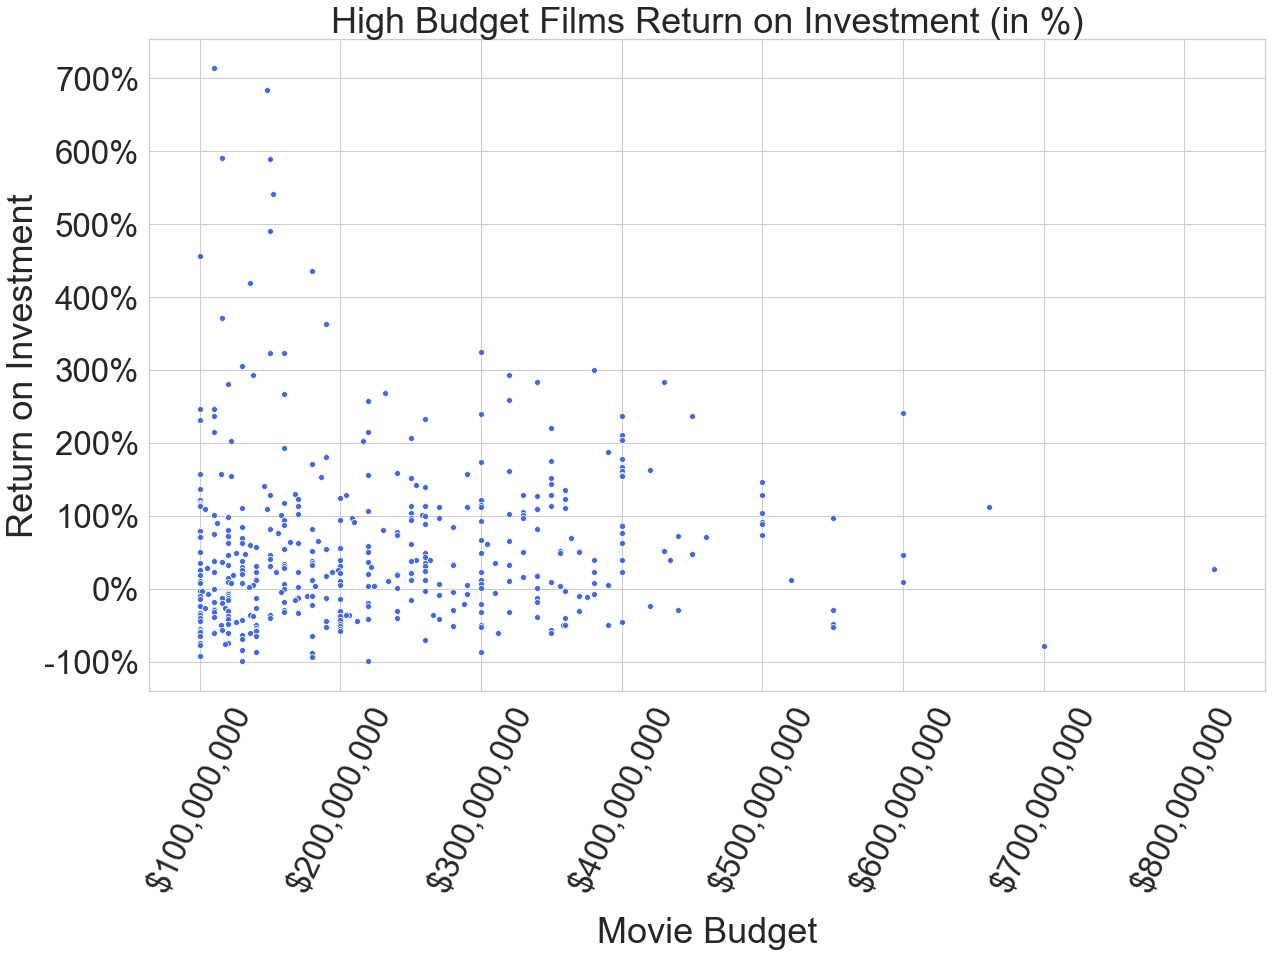

In [10]:
def HB_ROI_scatter (dataframe):
    
    fig, ax = plt.subplots(figsize = (20, 12))
    sns.scatterplot(data = df[df['budget_category'] == 'high'], x = 'total_costs', y = 'ROI', ax = ax, color = 'royalblue')
    plt.xlabel('Movie Budget')
    plt.ylabel('Return on Investment')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    plt.xticks(rotation=65)
    plt.title('High Budget Films Return on Investment (in %)')
    ax.xaxis.labelpad = 20
    
    return plt.show()

#fig.savefig('highbudgetROIscatter', bbox_inches='tight')

In [7]:
budget_mean = df.groupby('budget_category')['ROI'].mean()
budget_mean

budget_category
high     58.799028
low     208.967988
mid      45.227444
Name: ROI, dtype: float64

In [8]:
budget_median = df.groupby('budget_category')['ROI'].median()
budget_median

budget_category
high    32.661031
low     -1.745305
mid      4.854692
Name: ROI, dtype: float64

Text(0.5, 1.0, 'Budget Category vs Median ROI')

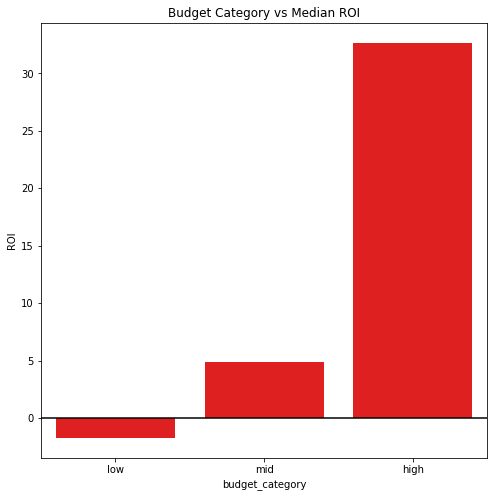

In [9]:

fig, ax = plt.subplots(figsize = (8, 8))
sns.barplot(data = df, x = budget_median.index, y = budget_median, color = 'red', order = ['low', 'mid', 'high'])
ax.axhline(y= 0, color = 'black')
ax.set_title('Budget Category vs Median ROI')

Median was used to account for outliers. 

Text(0.5, 1.0, 'Budget Category vs. Average ROI')

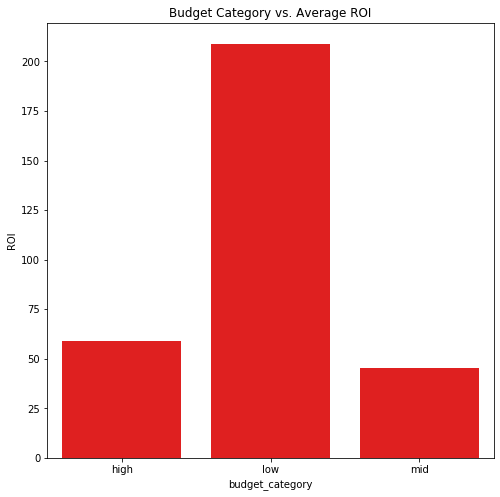

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(data = df, x = budget_mean.index, y = budget_mean, color = 'red')
ax.set_title('Budget Category vs. Average ROI')

/Users/laurenphipps/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


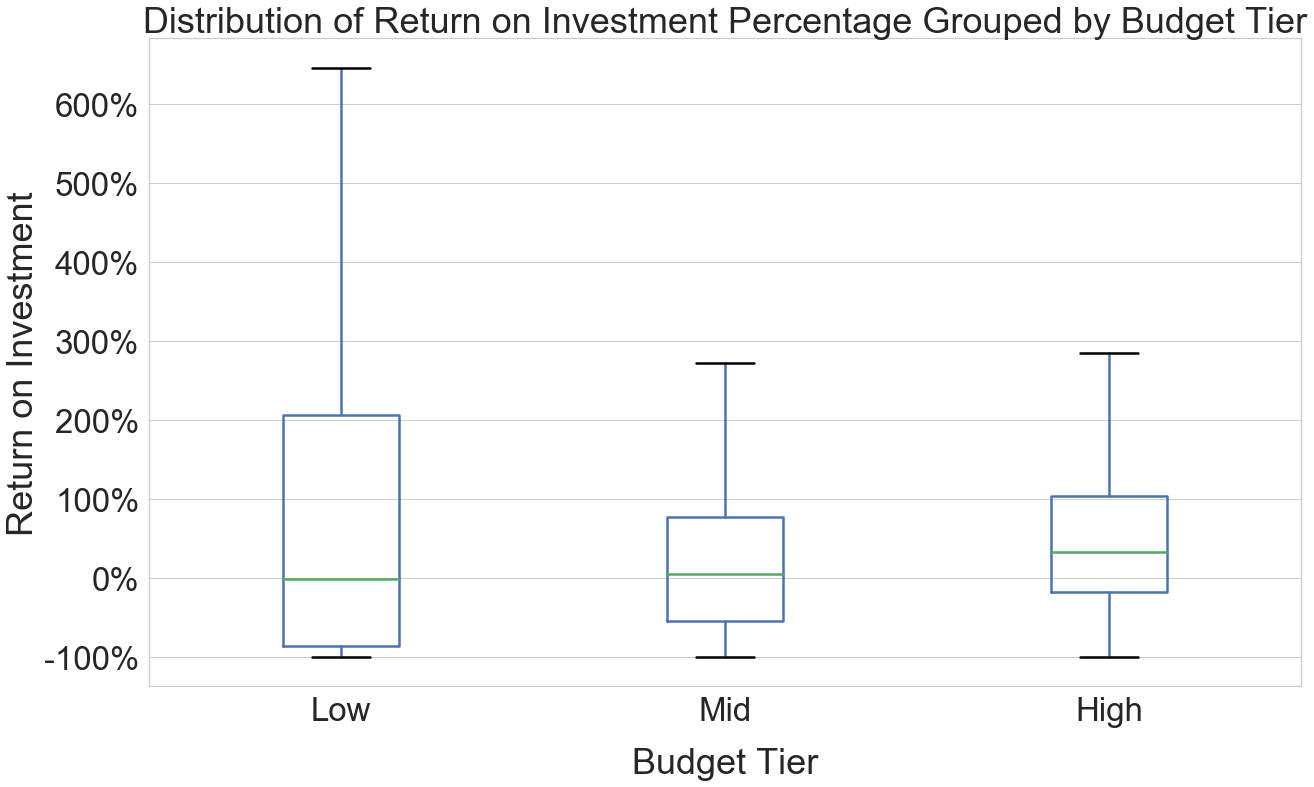

In [198]:
def ROI_budget_boxplot(dataframe):

    fig, ax = plt.subplots(figsize = (20,12))
    dataframe.boxplot(column = ['ROI'], by = ['budget_category'], ax=ax, showfliers = False, positions = [2, 0, 1],
               boxprops= dict(linewidth=2.5, color='blue'), 
               whiskerprops=dict(linestyle='-',linewidth=2.5, color='black'), 
               medianprops = dict(linewidth = 2.5, color = 'red'), capprops = dict(linewidth = 2.5))
    ax.set_ylabel('Return on Investment')
    ax.set_xlabel('Budget Tier')
    plt.grid(which='major', axis='x')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title('Distribution of Return on Investment Percentage Grouped by Budget Tier')
    plt.xticks([0, 1, 2,], ['Low', 'Mid', 'High'])
    ax.xaxis.labelpad = 20
    fig.suptitle("")

    return plt.show()

fig.savefig('budgettierboxplot', bbox_inches='tight')

This graph shows that the median is highest for high budget films and that only a small percentage of those movies have a negative ROI and would lose money. They are the safest investment to get a postive ROI. Low budget films do have the highest portion of movies that will lose money, but at the same time, have the highest range of positive ROI's. The upper end of the box denotes the 75th percentile and that is at 200%, while the whiskers denoting the 90th percentile is significantly higher at over 600% return. This shows that there is potential to get a very high return on an investment in a low budget film. 

In [15]:
def create_genre_dfs (DataFrame)

    action = DataFrame[DataFrame['genres_Action_id'] == 1]
    adventure = DataFrame[DataFrame['genres_Adventure_id'] == 1]
    comedy = DataFrame[DataFrame['genres_Comedy_id'] == 1]
    family = DataFrame[DataFrame['genres_Family_id'] == 1]
    thriller = DataFrame[DataFrame['genres_Thriller_id'] == 1]
    documentary = DataFrame[DataFrame['genres_Documentary_id'] == 1]
    other = DataFrame[DataFrame['genres_tuple'] == '(0, 0, 0, 0, 0, 0, 0)']
    drama = DataFrame[DataFrame['genres_Drama_id'] == 1]

In order to be able to analyze each genre, the data set was separated into eight smaller data sets based on it's genre classification. The distribution of the returns on investment could then be analyzed within each data set. 

/Users/laurenphipps/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


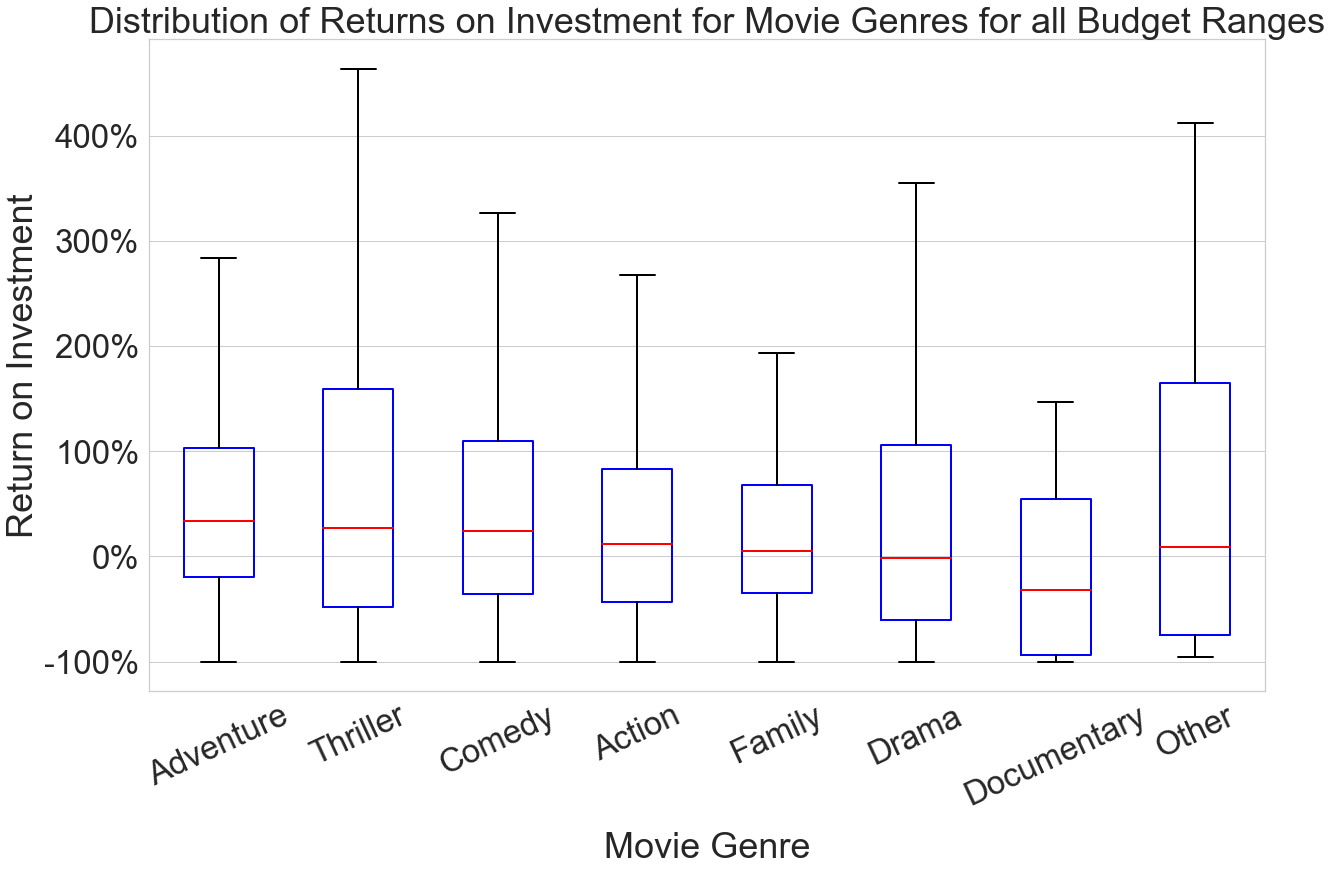

In [17]:
def genre_boxplot ()

    fig,  ax = plt.subplots(figsize = (20,12))
    ax.boxplot([adventure['ROI'], thriller['ROI'], comedy['ROI'], action['ROI'], family['ROI'], drama['ROI'], documentary['ROI'], 
                other['ROI']], 
                showfliers = False, 
                boxprops= dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linestyle='-',linewidth=2.0, color='black'), 
                medianprops = dict(linewidth = 2.0, color = 'red'), capprops = dict(linewidth = 2.0))

    ax.set_title('Distribution of Returns on Investment for Movie Genres for all Budget Ranges')
    ax.set_ylabel('Return on Investment')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel('Movie Genre')
    plt.grid(which='major', axis='x')
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['Adventure', 'Thriller', 'Comedy', 'Action', 'Family', 'Drama', 'Documentary', 'Other'])
    fig.suptitle("")
    plt.xticks(rotation=25)
    ax.xaxis.labelpad = 20

    return 
fig.savefig('genreROIboxplot', bbox_inches='tight')

When investing in movies, it is important to know if certain genres lead to a higher return on investment than others. To answer this question, the data was broken into 7 genres. These were the most common genres contained in the data set. Some movies were categorized as more than one genre. Those movies are included in each of the listed genres. For example, if a movie is considered Action and Adventure, it's data in included in both genres because it is representative of both genres. The final category is "other" for any movies that did not fall into one of the seven listed genres. 

Because there is a wide range of values for returns on investment, it is beneficial to use a boxplot to get a more complete look at the data for each genre. Outliers have been excluded from this plot, but is still part of the data. Their impact can be seen from the range of the whiskers. The median is represented by the red line. Because of the significant outliers, the median is a better representation of the data than the mean. 

With the exception of documentaries, all genres have a median return on investment between 0% and 50%, with adventure and thriller movies having the highest. Most genres have their 25%-75% quartile range, so most of the data points, between 0 and 100% return. However, thriller movies have the most significant outliers and the highest 75% quartile range (with the exception of the other category). This means that there are more thriller movies that have a return on investment about 100%, with some ranging upwards of 400%. 

In [ ]:
df.describe()

In [ ]:
comedy.describe()

As the plot above shows, there is no correlation between movie budget and return on investment for low budget films (movies with budgets under $ 25 million).

As the plot above shows, there is no correlation between movie budget and return on investment for mid-range budget films (movies with budgets between $ 25 million and $ 100 million). 

As the plot above shows, there is no correlation between movie budget and return on investment for low budget films (movies with budgets over $100 million).

With the exception of documentaries, all genres have a positive median return on investment, meaning more than half of the movies in each of those genres will make a profit. Adventure and thriller movies have the highest median ROI. Overall, adventure films are the most likely to have a positive ROI, which is shown by having the highest amount of their box and top whisker above 0%. However, thriller movies have the highest range of positive ROI's, with it's 90th percentile (shown as the top whisker) reaching over 400%. This shows that thriller movies do have the potential to be highest return on an investment. 

LOW BUDGET: 

This graph shows that, for low budget films, most genres do not have a positive median ROI. The exception is for low-budget thriller films. These yield a median ROI of 100%, which corresponds with doubling the initial investment in the film. 

MID BUDGET: 

Adventure, comedy, and thriller movies with a mid-range budget have a modestly positive median ROI, with values ranging from 10-20% ROI. Documentaries with a mid-range budget yielded the lowest median ROI at -30%, showing that most of lost money. 

HIGH BUDGET:

High budget films across all genres yielded a positive ROI, with adventure, comedy, and thriller films yielding the highest. This graph confirms that most films that have a budget of over $100 million will have a positve return on that investment. 